<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-the-concentration-dataset" data-toc-modified-id="Read-in-the-concentration-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in the concentration dataset</a></span></li><li><span><a href="#Get-a-feeling-for-the-range-of-concentrations" data-toc-modified-id="Get-a-feeling-for-the-range-of-concentrations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get a feeling for the range of concentrations</a></span></li><li><span><a href="#Create-a-normalized-pallette" data-toc-modified-id="Create-a-normalized-pallette-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create a normalized pallette</a></span></li><li><span><a href="#plot-the-grid" data-toc-modified-id="plot-the-grid-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>plot the grid</a></span></li></ul></div>

# Plotting fields using pcolormesh

Matplotlib has a couple of different ways of plotting 2-dimensional fields.
For problems typical of our class, contourf is usually not what we want,
because it does its own interpolation on the gridcells.  If you don't
want that smearing, then use pcolor or pcolormesh.  The p stands for "pseudo"
(because concentrations don't really have colors, and the "mesh" indicates
that the routine is laying down a cellular mesh to plot into).

Below I show how to use pcolormesh plus fancy pallette features to plot
limited ranges of data.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import context

setting context.data_dir to /Users/phil/repos/eosc213_students/notebooks/cookbook_examples


## Read in the concentration dataset

In [2]:
cp = np.load(context.data_dir / "colormap_data.npz")
x, y, c = cp["x"], cp["y"], cp["c"]

## Get a feeling for the range of concentrations

(array([5.528e+03, 3.080e+02, 1.000e+02, 2.000e+01, 1.200e+01, 1.200e+01,
        0.000e+00, 4.000e+00, 0.000e+00, 1.600e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

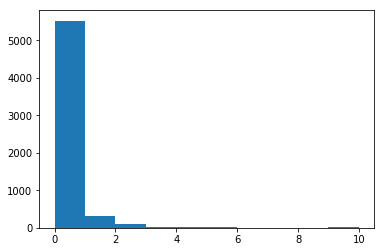

In [3]:
plt.hist(c.flat)

## Create a normalized pallette

The next cell allows me to focus on the concentration
values between 0.2 and 1.5.  It does this by assigning
all the 256 pallette colors values in that range.  If
a concentration is larger than 1.5 it gets colored white,
and if a color is less than 0. it gets colored teal.  If the data
is missing, it is colored light gray (i.e. 0.75 as bright as white)

"xkcd" below is a reference to the [xkcd color names](https://xkcd.com/color/rgb/)
which are explained (in pretty interesting) detail [here](https://blog.xkcd.com/2010/05/03/color-survey-results/)



In [4]:
pal = plt.get_cmap("RdYlBu").reversed()
pal.set_bad("0.75")  # 75% grey for np.nan (missing data)
pal.set_over("xkcd:white")  # color cells > vmax white
pal.set_under("xkcd:teal")  # color cells < vmin teal
vmax = 1.5
vmin = 0.2
the_norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)

## plot the grid

I had trouble putting a fancy pallette on the axes_grid1 layout
we were using, so I went back to basics and placed the colorbar by hand.
Things to note:

1.  I needed to set the aspect ratio to 1 to preserve the rectangular shape.
    If you comment out the_ax.set_aspect(1) below you'll get square
    axes, which is not what we want.

2.  I set concentrations smaller than 1.e-4 to missing/np.nan, so they get
    their own color initially and it is clear that the spot is diffusing
    into clean water.

3.  I create axes number 10 to hold the colorbar by specifying x,y coordinates
    for the lower corner as 0.92,0.1 a width of 0.025 and and height of
    0.55.  This was pure trial and error.

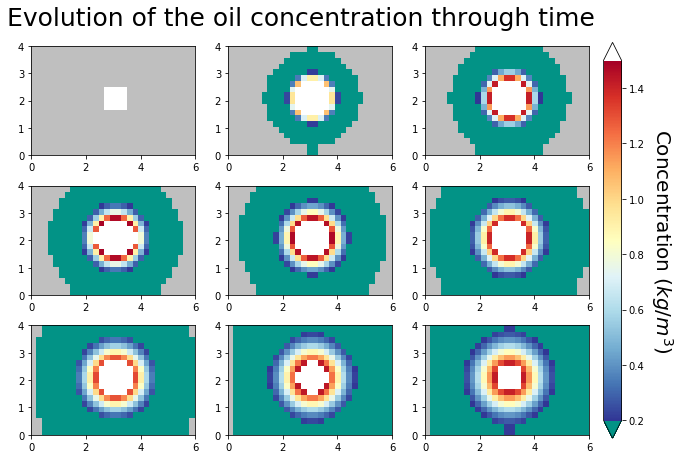

In [6]:
plot_c = np.array(c)
plot_c[plot_c < 1.0e-4] = np.nan
m2km = 1.0e-3
time_steps = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
nfig = len(time_steps)
fig, grid = plt.subplots(3, 3, figsize=(10, 10))
ntimesteps = len(time_steps)

for time_index, the_ax in zip(time_steps, grid.flat):
    im = the_ax.pcolormesh(
        x * m2km, y * m2km, plot_c[:, :, time_index], norm=the_norm, cmap=pal
    )
    the_ax.set_aspect(1)
    fig.subplots_adjust(bottom=0.1, top=0.65)

cax = fig.add_axes([0.92, 0.1, 0.025, 0.55], frameon=False)
cbar = matplotlib.colorbar.Colorbar(cax, im, extend="both")
cbar.ax.set_ylabel("Concentration ($kg/m^3$)", rotation=270, size=20, va="bottom")
fig.suptitle(
    "Evolution of the oil concentration through time", y=0.7, size=25, va="top"
);